In [30]:
library(dplyr)
library(mltools)
library(data.table)
library(devtools)
library(ggbiplot)

Le chargement a nécessité le package : ggplot2

Warning message:
"le package 'ggplot2' a été compilé avec la version R 4.2.2"
Le chargement a nécessité le package : plyr

Warning message:
"le package 'plyr' a été compilé avec la version R 4.2.2"
------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attachement du package : 'plyr'


Les objets suivants sont masqués depuis 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Le chargement a nécessité le package : scales

Warning message:
"le package 'scales' a été compilé avec la version R 4.2.2"
Le chargement a nécessité le package : grid



## Visualisation

In [3]:
Abalone <- read.csv("Abalone.csv")

In [4]:
str(Abalone)

'data.frame':	4177 obs. of  9 variables:
 $ Sex           : chr  "M" "M" "F" "M" ...
 $ Length        : num  0.455 0.35 0.53 0.44 0.33 0.425 0.53 0.545 0.475 0.55 ...
 $ Diameter      : num  0.365 0.265 0.42 0.365 0.255 0.3 0.415 0.425 0.37 0.44 ...
 $ Height        : num  0.095 0.09 0.135 0.125 0.08 0.095 0.15 0.125 0.125 0.15 ...
 $ Whole_Weight  : num  0.514 0.226 0.677 0.516 0.205 ...
 $ Shucked_Weight: num  0.2245 0.0995 0.2565 0.2155 0.0895 ...
 $ Viscera_Weight: num  0.101 0.0485 0.1415 0.114 0.0395 ...
 $ SHell_Weight  : num  0.15 0.07 0.21 0.155 0.055 0.12 0.33 0.26 0.165 0.32 ...
 $ Rings         : num  15 NA 9 NA 7 NA 20 NA NA 19 ...


In [5]:
summary(Abalone)

     Sex                Length         Diameter          Height      
 Length:4177        Min.   :0.075   Min.   :0.0550   Min.   :0.0000  
 Class :character   1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150  
 Mode  :character   Median :0.545   Median :0.4250   Median :0.1400  
                    Mean   :0.524   Mean   :0.4078   Mean   :0.1395  
                    3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650  
                    Max.   :0.815   Max.   :0.6500   Max.   :1.1300  
                                    NA's   :25                       
  Whole_Weight    Shucked_Weight   Viscera_Weight    SHell_Weight   
 Min.   :0.0020   Min.   :0.0010   Min.   :0.0005   Min.   :0.0015  
 1st Qu.:0.4415   1st Qu.:0.1860   1st Qu.:0.0935   1st Qu.:0.1300  
 Median :0.7995   Median :0.3360   Median :0.1710   Median :0.2340  
 Mean   :0.8287   Mean   :0.3594   Mean   :0.1806   Mean   :0.2388  
 3rd Qu.:1.1530   3rd Qu.:0.5020   3rd Qu.:0.2530   3rd Qu.:0.3290  
 Max.   :2.8255   Max.   :

In [6]:
options(repr.plot.width=25,repr.plot.height=5)

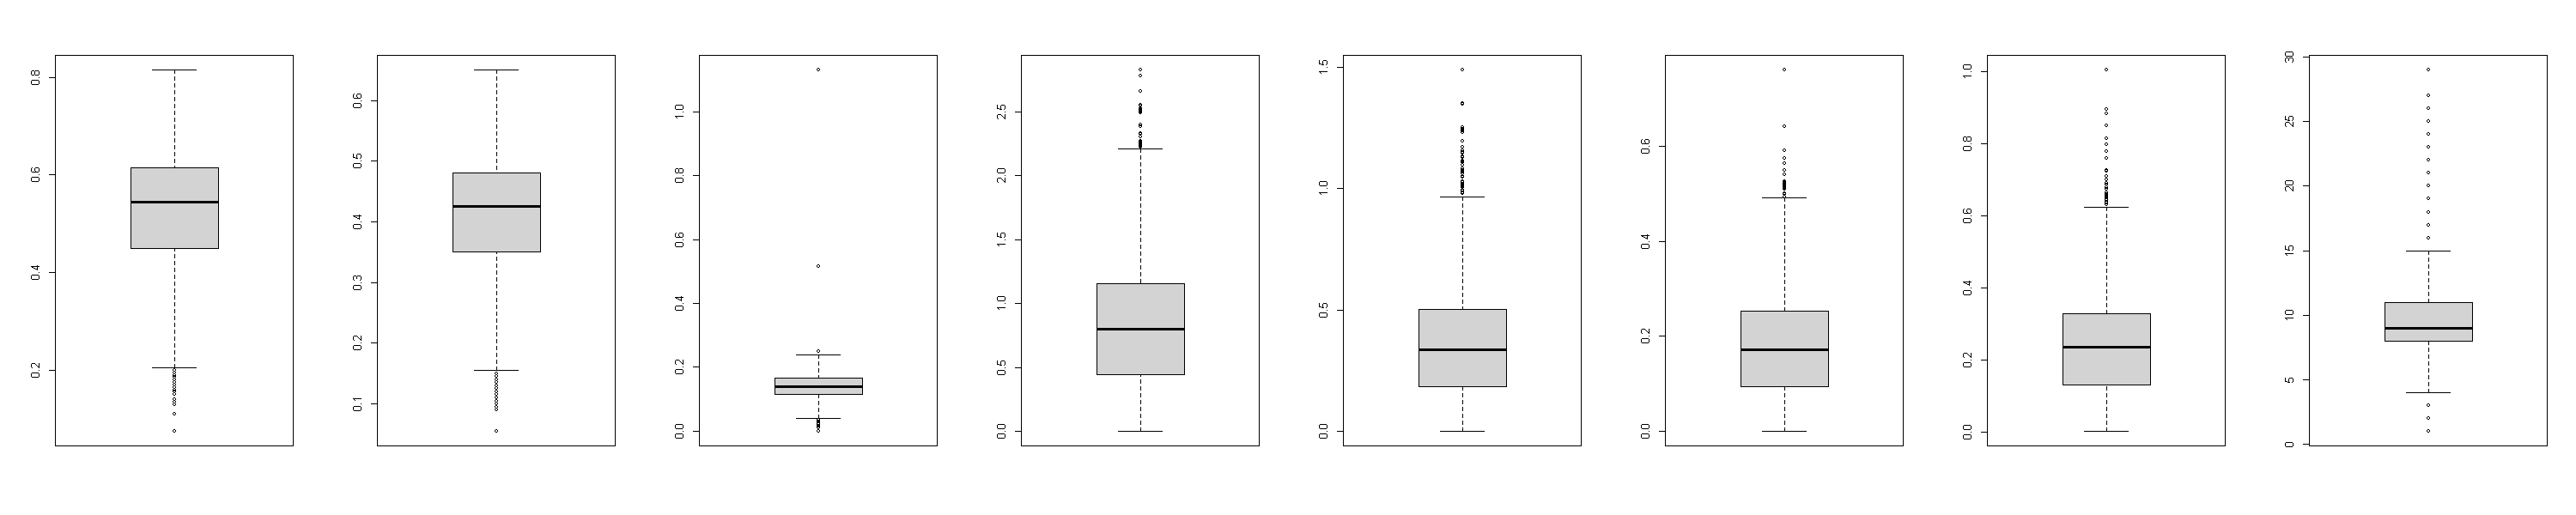

In [7]:
par(mfrow=c(1,8))
#boxplot
boxplot(Abalone$Length)
boxplot(Abalone$Diameter)
boxplot(Abalone$Height)
boxplot(Abalone$Whole_Weight)
boxplot(Abalone$Shucked_Weight)
boxplot(Abalone$Viscera_Weight)
boxplot(Abalone$SHell_Weight)
boxplot(Abalone$Rings)

In [8]:
outliers <- function(x) {

  Q1 <- quantile(x, probs=.25)
  Q3 <- quantile(x, probs=.75)
  iqr = Q3-Q1

 upper_limit = Q3 + (iqr*1.5)
 lower_limit = Q1 - (iqr*1.5)

 x > upper_limit | x < lower_limit
}

remove_outliers <- function(df,cols) {
  for (col in cols) {
    df <- df[!outliers(df[[col]]),]
  }
  df
}

In [9]:
no_missing_abalone = Abalone[complete.cases(Abalone), ]
num_only = select(no_missing_abalone,-Sex)
Abalone <- remove_outliers(no_missing_abalone, colnames(num_only))

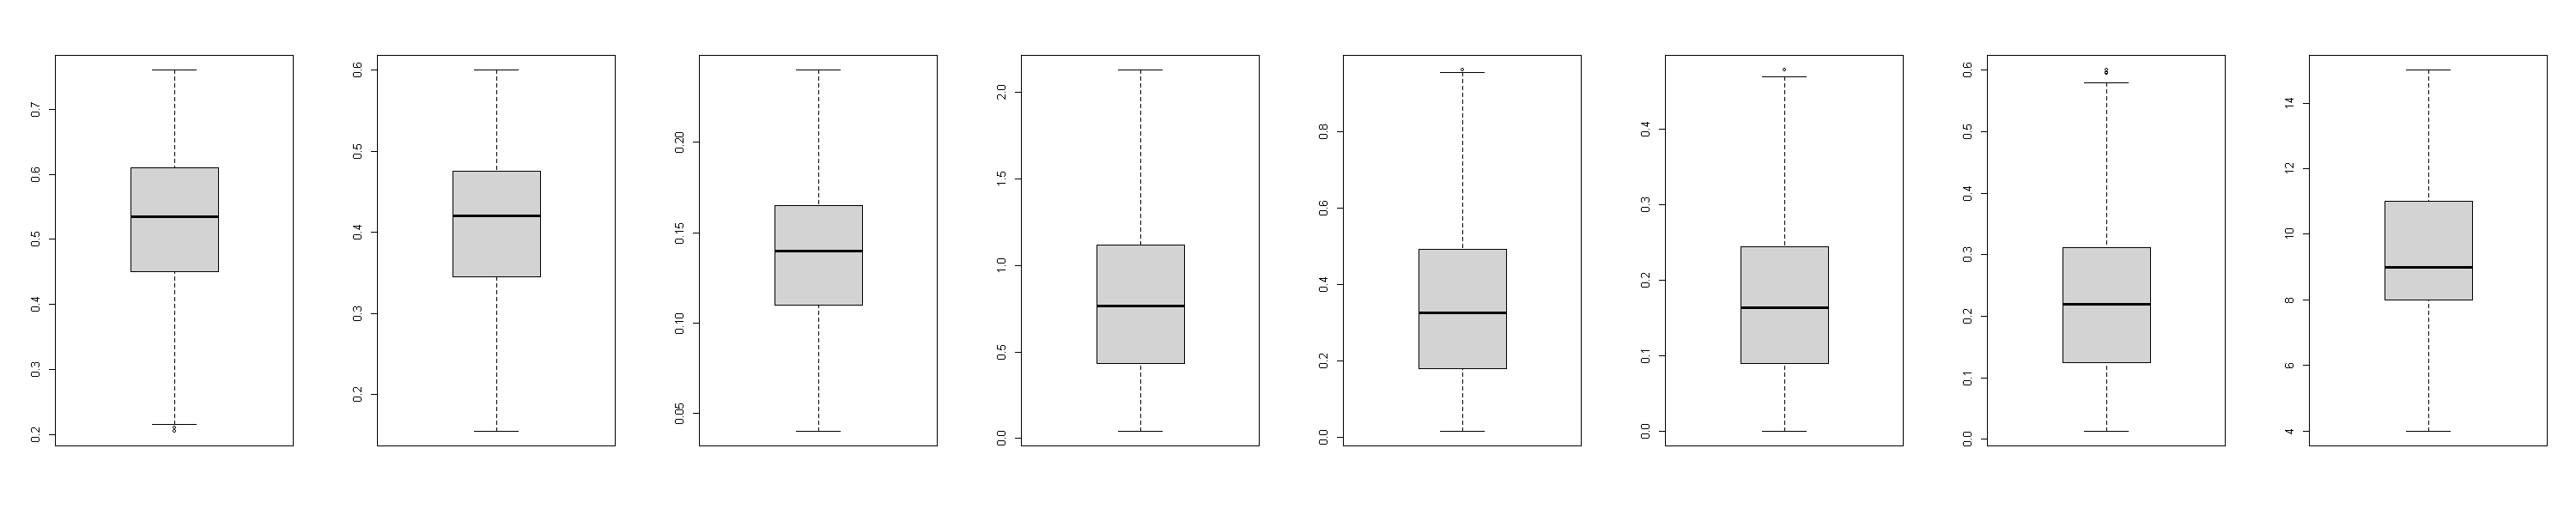

In [10]:
par(mfrow=c(1,8))
#boxplot
boxplot(Abalone$Length)
boxplot(Abalone$Diameter)
boxplot(Abalone$Height)
boxplot(Abalone$Whole_Weight)
boxplot(Abalone$Shucked_Weight)
boxplot(Abalone$Viscera_Weight)
boxplot(Abalone$SHell_Weight)
boxplot(Abalone$Rings)

## Régression Linéaire
#### Varibale à éxpliquer: "Diameter"

In [11]:
Abalone$Sex <- as.factor(Abalone$Sex)
encoded_data <- one_hot(as.data.table(Abalone))

In [12]:
str(encoded_data)

Classes 'data.table' and 'data.frame':	3706 obs. of  12 variables:
 $ Sex_          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Sex_F         : int  0 1 0 1 0 0 1 1 0 0 ...
 $ Sex_I         : int  0 0 1 0 0 0 0 0 0 1 ...
 $ Sex_M         : int  1 0 0 0 1 1 0 0 1 0 ...
 $ Length        : num  0.455 0.53 0.33 0.525 0.43 0.49 0.535 0.47 0.5 0.355 ...
 $ Diameter      : num  0.365 0.42 0.255 0.38 0.35 0.38 0.405 0.355 0.4 0.28 ...
 $ Height        : num  0.095 0.135 0.08 0.14 0.11 0.135 0.145 0.1 0.13 0.085 ...
 $ Whole_Weight  : num  0.514 0.677 0.205 0.607 0.406 ...
 $ Shucked_Weight: num  0.2245 0.2565 0.0895 0.194 0.1675 ...
 $ Viscera_Weight: num  0.101 0.1415 0.0395 0.1475 0.081 ...
 $ SHell_Weight  : num  0.15 0.21 0.055 0.21 0.135 0.19 0.205 0.185 0.24 0.115 ...
 $ Rings         : num  15 9 7 14 10 11 10 10 12 7 ...
 - attr(*, ".internal.selfref")=<externalptr> 


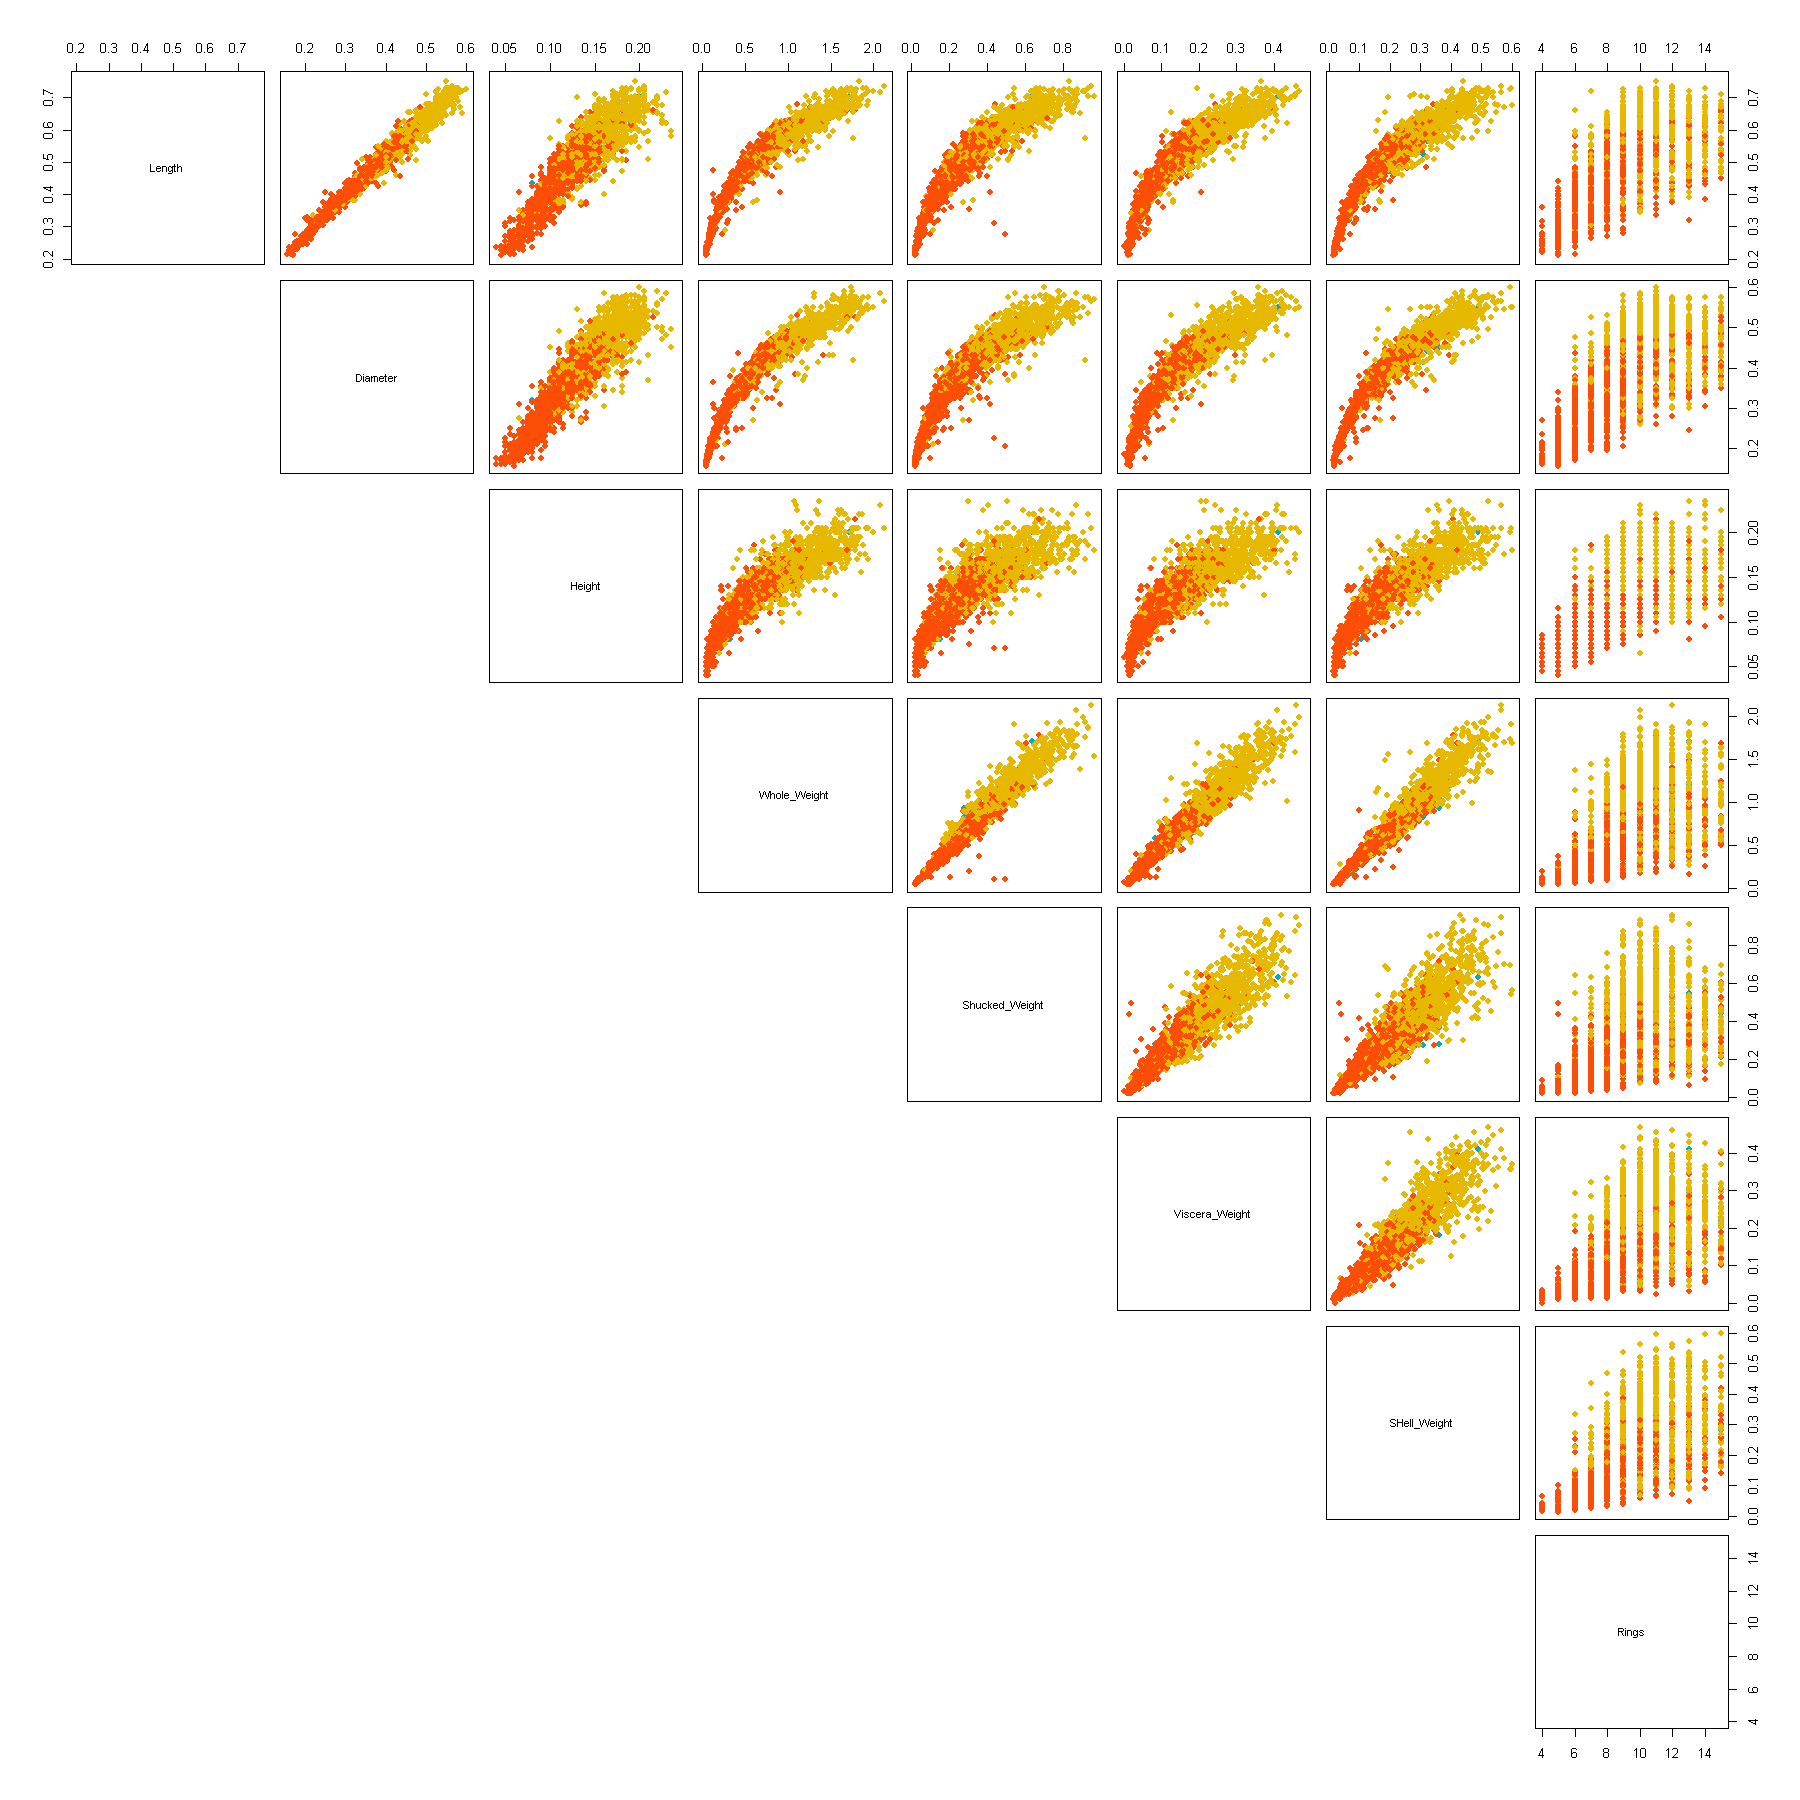

In [13]:
options(repr.plot.width=15,repr.plot.height=15)

my_cols <- c("#00AFBB", "#E7B800", "#FC4E07")

num_only <- select(Abalone,-Sex)
pairs(num_only, pch = 19,
col = my_cols[Abalone$Sex],
lower.panel = NULL)

In [14]:
diameter.lm = lm(Diameter ~ ., data=encoded_data)

In [15]:
summary(diameter.lm)


Call:
lm(formula = Diameter ~ ., data = encoded_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.106641 -0.007994 -0.000300  0.008069  0.090804 

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.0030620  0.0024549   1.247 0.212360    
Sex_           -0.0011387  0.0036392  -0.313 0.754371    
Sex_F           0.0010143  0.0005899   1.719 0.085643 .  
Sex_I          -0.0024976  0.0006738  -3.707 0.000213 ***
Sex_M                  NA         NA      NA       NA    
Length          0.6986590  0.0069234 100.913  < 2e-16 ***
Height          0.1160828  0.0172788   6.718 2.12e-11 ***
Whole_Weight    0.0004654  0.0055789   0.083 0.933521    
Shucked_Weight  0.0093979  0.0065760   1.429 0.153054    
Viscera_Weight -0.0369080  0.0098337  -3.753 0.000177 ***
SHell_Weight    0.0803589  0.0092399   8.697  < 2e-16 ***
Rings           0.0007567  0.0001444   5.241 1.69e-07 ***
---
Signif. codes:  0

=> 97% de la variabilité du diamètre est éxpliquée par la relation de linéarité multiple avec les variables explicatives

Pour améliorer la performance du modèle on peut éliminer quelques variables explicatives et observer $R^2$

Après avoir utiliser toutes les variabeles, avec chaque itération, on commence à eliminer les varibles une par une et si la variable n'augmente pas le performance du modèle. La métrique utiliser pour vérifier est AIC


In [16]:
step(diameter.lm , direction = "backward")

Start:  AIC=-31401.03
Diameter ~ Sex_ + Sex_F + Sex_I + Sex_M + Length + Height + Whole_Weight + 
    Shucked_Weight + Viscera_Weight + SHell_Weight + Rings


Step:  AIC=-31401.03
Diameter ~ Sex_ + Sex_F + Sex_I + Length + Height + Whole_Weight + 
    Shucked_Weight + Viscera_Weight + SHell_Weight + Rings

                 Df Sum of Sq     RSS    AIC
- Whole_Weight    1   0.00000 0.77009 -31403
- Sex_            1   0.00002 0.77011 -31403
<none>                        0.77009 -31401
- Shucked_Weight  1   0.00043 0.77051 -31401
- Sex_F           1   0.00062 0.77070 -31400
- Sex_I           1   0.00286 0.77295 -31389
- Viscera_Weight  1   0.00294 0.77302 -31389
- Rings           1   0.00572 0.77581 -31376
- Height          1   0.00941 0.77949 -31358
- SHell_Weight    1   0.01576 0.78585 -31328
- Length          1   2.12235 2.89244 -26499

Step:  AIC=-31403.03
Diameter ~ Sex_ + Sex_F + Sex_I + Length + Height + Shucked_Weight + 
    Viscera_Weight + SHell_Weight + Rings

                 


Call:
lm(formula = Diameter ~ Sex_F + Sex_I + Length + Height + Shucked_Weight + 
    Viscera_Weight + SHell_Weight + Rings, data = encoded_data)

Coefficients:
   (Intercept)           Sex_F           Sex_I          Length          Height  
     0.0030343       0.0010285      -0.0024822       0.6986457       0.1161701  
Shucked_Weight  Viscera_Weight    SHell_Weight           Rings  
     0.0098885      -0.0363886       0.0808497       0.0007572  


In [17]:
nouv_model = lm(formula = Diameter ~ Sex_F + Sex_I + Length + Height + Shucked_Weight + Viscera_Weight + SHell_Weight + Rings, data = encoded_data)

In [18]:
summary(nouv_model)


Call:
lm(formula = Diameter ~ Sex_F + Sex_I + Length + Height + Shucked_Weight + 
    Viscera_Weight + SHell_Weight + Rings, data = encoded_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.106624 -0.008002 -0.000297  0.008066  0.090814 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.0030343  0.0024478   1.240  0.21520    
Sex_F           0.0010285  0.0005881   1.749  0.08041 .  
Sex_I          -0.0024822  0.0006710  -3.699  0.00022 ***
Length          0.6986457  0.0069190 100.975  < 2e-16 ***
Height          0.1161701  0.0172719   6.726 2.01e-11 ***
Shucked_Weight  0.0098885  0.0037782   2.617  0.00890 ** 
Viscera_Weight -0.0363886  0.0078030  -4.663 3.22e-06 ***
SHell_Weight    0.0808497  0.0066023  12.246  < 2e-16 ***
Rings           0.0007572  0.0001435   5.276 1.39e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01443 on 3697 degrees of freedom
Multiple R-squar

### Analyse Composante Principale

In [19]:
abalone.pca = prcomp(select(Abalone,-Sex),center=TRUE,scale.=TRUE)

In [20]:
summary(abalone.pca)

Importance of components:
                          PC1     PC2     PC3    PC4     PC5     PC6     PC7
Standard deviation     2.6292 0.80727 0.39118 0.3567 0.26716 0.25256 0.11571
Proportion of Variance 0.8641 0.08146 0.01913 0.0159 0.00892 0.00797 0.00167
Cumulative Proportion  0.8641 0.94556 0.96469 0.9806 0.98951 0.99748 0.99916
                           PC8
Standard deviation     0.08217
Proportion of Variance 0.00084
Cumulative Proportion  1.00000

Proportion of variance: donne le pourcentage expliqué par PC-X de variance totale

In [21]:
str(abalone.pca)

List of 5
 $ sdev    : num [1:8] 2.629 0.807 0.391 0.357 0.267 ...
 $ rotation: num [1:8, 1:8] 0.369 0.37 0.356 0.374 0.36 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:8] "Length" "Diameter" "Height" "Whole_Weight" ...
  .. ..$ : chr [1:8] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:8] 0.521 0.405 0.137 0.79 0.347 ...
  ..- attr(*, "names")= chr [1:8] "Length" "Diameter" "Height" "Whole_Weight" ...
 $ scale   : Named num [1:8] 0.1114 0.0922 0.0352 0.4423 0.2031 ...
  ..- attr(*, "names")= chr [1:8] "Length" "Diameter" "Height" "Whole_Weight" ...
 $ x       : num [1:3706, 1:8] -1.155 -0.394 -4.024 -0.138 -1.987 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3706] "1" "3" "5" "11" ...
  .. ..$ : chr [1:8] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


$rotation: correlation entre variables initiales et les PCs

On va détérminer le position de chaque observation par rapport à PC1 et PC2

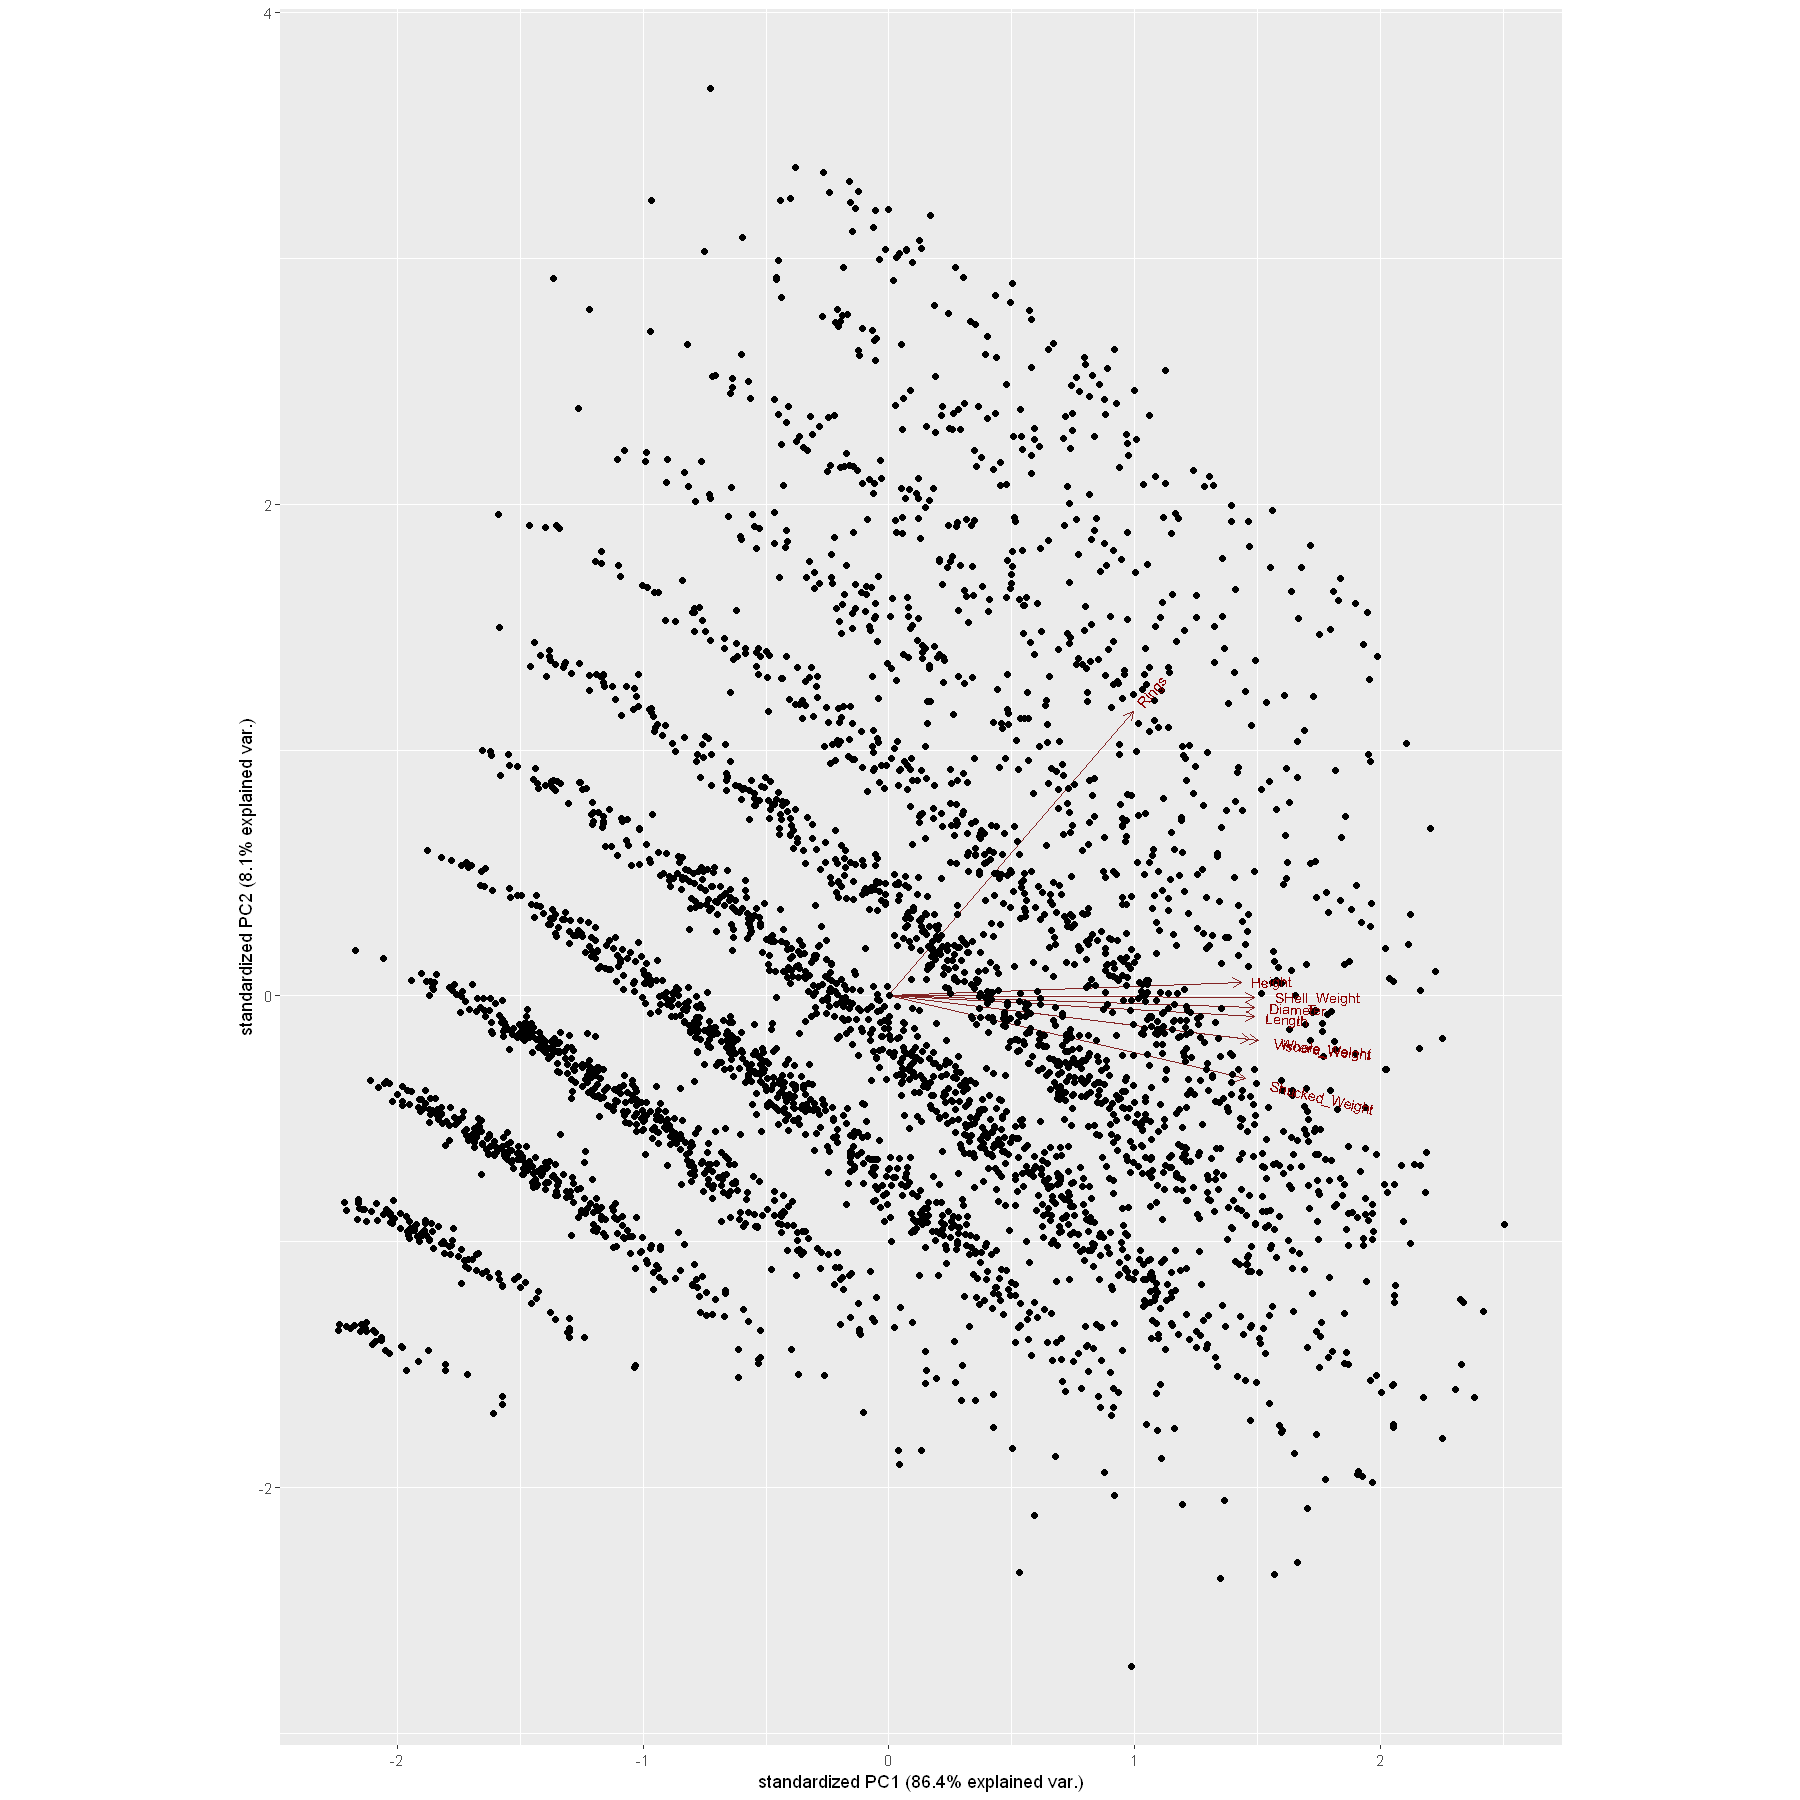

In [34]:
ggbiplot(abalone.pca)